In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("plastic_dataset_no_outliers_5000.csv")

In [4]:
df.head()

,Item Category,Material Texture,Item Color,Approximate Size,Approximate Quantity,Condition,Item Usage,Recycling Symbol,Location,Resale Value (INR),Recycle Score (0-10),Reuse Score (0-10)
0,Water Can (20L),Hard Plastic,White,Small,3.0,Poor,Household Use,No,Ahmedabad,90.35,5.37,1.47
1,Food Container,Soft Plastic,Colored,Medium,7.0,Average,Household Use,No,Mumbai,85.59,4.09,4.12
2,Dustbin,Hard Plastic,Colored,Bulk,4.0,Good,Household Use,No,Jaipur,671.57,4.61,8.02
3,Plastic Pallet,Thin Film,Colored,Medium,3.0,Good,Commercial Packaging,No,Jaipur,993.45,2.39,3.18
4,Tiffin Box,Hard Plastic,Transparent,Medium,5.0,Good,Household Use,Not Sure,Nagpur,317.39,5.70,7.95


In [5]:
df.isna().sum()

Item Category             0
Material Texture        286
Item Color              297
Approximate Size          0
Approximate Quantity    289
Condition               337
Item Usage                0
Recycling Symbol        313
Location                290
Resale Value (INR)        0
Recycle Score (0-10)      0
Reuse Score (0-10)        0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item Category         5000 non-null   object 
 1   Material Texture      4714 non-null   object 
 2   Item Color            4703 non-null   object 
 3   Approximate Size      5000 non-null   object 
 4   Approximate Quantity  4711 non-null   float64
 5   Condition             4663 non-null   object 
 6   Item Usage            5000 non-null   object 
 7   Recycling Symbol      4687 non-null   object 
 8   Location              4710 non-null   object 
 9   Resale Value (INR)    5000 non-null   float64
 10  Recycle Score (0-10)  5000 non-null   float64
 11  Reuse Score (0-10)    5000 non-null   float64
dtypes: float64(4), object(8)
memory usage: 468.9+ KB


## Data Validation

In [7]:
def colvalidate(df, col):
    print(f"Column: {col}")
    print()
    print(f"Number of Unique Values in Column: {df[col].nunique()}")
    print()
    print("Unique Values:")
    for indx in range(0, df[col].nunique(), 100):
        print(df[col].unique()[indx:indx+100])
        print()
    print("Data Type of Column:", df[col].dtype)
    print()

In [8]:
df = df[["Item Category","Material Texture","Item Color","Approximate Size","Approximate Quantity","Condition","Item Usage","Recycling Symbol","Location","Resale Value (INR)","Recycle Score (0-10)","Reuse Score (0-10)"]]

In [9]:
for col in df.columns:
    print("*****",col,"*****")
    colvalidate(df,col)

***** Item Category *****
Column: Item Category

Number of Unique Values in Column: 24

Unique Values:
['Water Can (20L)' 'Food Container' 'Dustbin' 'Plastic Pallet'
 'Tiffin Box' 'Plastic Crate' 'Plastic Jar' 'Baby Bath Tub'
 'Industrial Storage Bin' 'Large Storage Container' 'Baby Chair'
 'Plastic Table' 'Laundry Basket' 'Plastic Chair' 'Cup/Plate' 'PVC Pipe'
 'HDPE Sheet' 'Plastic Drum' 'Storage Box' 'Plastic Bag' 'Plastic Stool'
 'Wrapper' 'Plastic Bottle' 'Bucket']

Data Type of Column: object

***** Material Texture *****
Column: Material Texture

Number of Unique Values in Column: 4

Unique Values:
['Hard Plastic' 'Soft Plastic' 'Thin Film' 'Flexible' nan]

Data Type of Column: object

***** Item Color *****
Column: Item Color

Number of Unique Values in Column: 5

Unique Values:
['White' 'Colored' 'Transparent' 'Mixed' 'Black' nan]

Data Type of Column: object

***** Approximate Size *****
Column: Approximate Size

Number of Unique Values in Column: 4

Unique Values:
['Small' '

## Duplicate Handling

In [10]:
df[df.duplicated()]

,Item Category,Material Texture,Item Color,Approximate Size,Approximate Quantity,Condition,Item Usage,Recycling Symbol,Location,Resale Value (INR),Recycle Score (0-10),Reuse Score (0-10)


## EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
def cstudy(col):
    print("Number of Categories/Classes in column:",df[col].nunique())
    print("Category Names:",df[col].unique())
    print("Value Counts (FD) of each Category:",df[col].value_counts())
    print("Mode:",df[col].mode()[0])

    # Frequency of each category
    event_counts = df[col].value_counts()
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()
    # Plot pie chart
    plt.figure(figsize=(6,6))
    plt.pie(
        event_counts,
        labels=event_counts.index,
        autopct='%1.1f%%',     # show percentages
        startangle=90,         # rotate chart for better view
    
    )
    plt.title(f"Distribution of {col}")
    plt.show()
def nstudy(col):
    print("Mean:",round(df[col].mean()))    
    print("Median:",round(df[col].median()))
    print("Mode:",round(df[col].mode()[0]))
    print("Range:",df[col].max()-df[col].min())
    print("Variance:",round(df[col].var()))
    print("Standard Deviation:",round(df[col].std()))
    print("Five Number Summary:",round(df[col].describe())[['min','25%','50%','75%','max']])
    print("Measures of Symmetry")
    print("Skewness:",round(df[col].skew(),2))
    print("Kurtosis:",round(df[col].kurt(),2))
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {col}")
    plt.show()
    plt.figure(figsize=(4, 3))
    sns.distplot(df[col])
    plt.show()
    print()
    
def datestudy(col):
    print("Minimum Date:", df[col].min())
    print("Maximum Date:", df[col].max())
    print("Date Range:", df[col].max() - df[col].min())
    
    print("Date Wise Frequency:")
    print(df[col].value_counts())
    print()


## Uni-Variate Analysis- Study of Single Column Data

Number of Categories/Classes in column: 24
Category Names: ['Water Can (20L)' 'Food Container' 'Dustbin' 'Plastic Pallet'
 'Tiffin Box' 'Plastic Crate' 'Plastic Jar' 'Baby Bath Tub'
 'Industrial Storage Bin' 'Large Storage Container' 'Baby Chair'
 'Plastic Table' 'Laundry Basket' 'Plastic Chair' 'Cup/Plate' 'PVC Pipe'
 'HDPE Sheet' 'Plastic Drum' 'Storage Box' 'Plastic Bag' 'Plastic Stool'
 'Wrapper' 'Plastic Bottle' 'Bucket']
Value Counts (FD) of each Category: Item Category
HDPE Sheet                 232
Water Can (20L)            229
Plastic Bottle             227
PVC Pipe                   225
Laundry Basket             224
Large Storage Container    219
Plastic Bag                219
Plastic Pallet             219
Industrial Storage Bin     216
Plastic Crate              213
Tiffin Box                 207
Plastic Stool              207
Bucket                     205
Cup/Plate                  203
Food Container             201
Storage Box                201
Baby Chair             

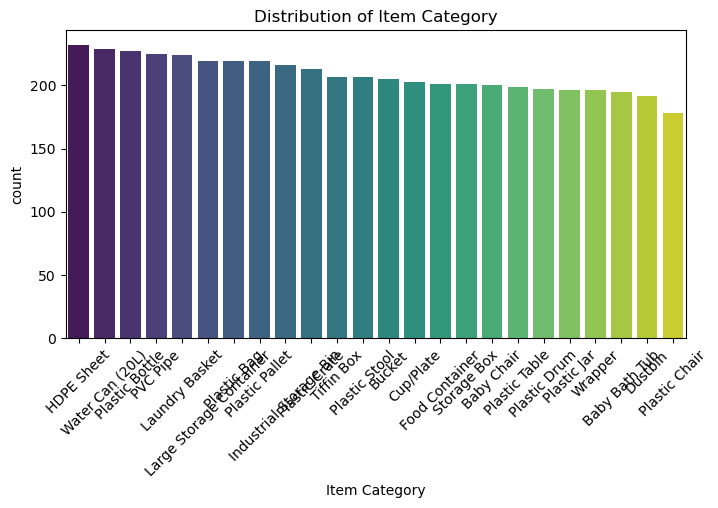

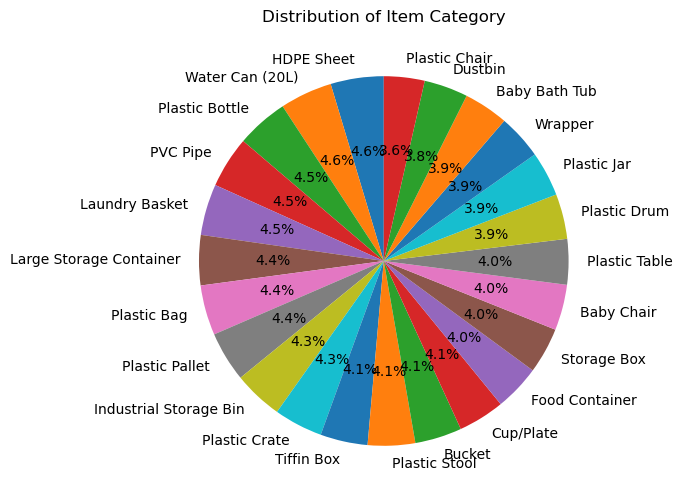

Number of Categories/Classes in column: 4
Category Names: ['Hard Plastic' 'Soft Plastic' 'Thin Film' 'Flexible' nan]
Value Counts (FD) of each Category: Material Texture
Flexible        1208
Soft Plastic    1186
Hard Plastic    1185
Thin Film       1135
Name: count, dtype: int64
Mode: Flexible


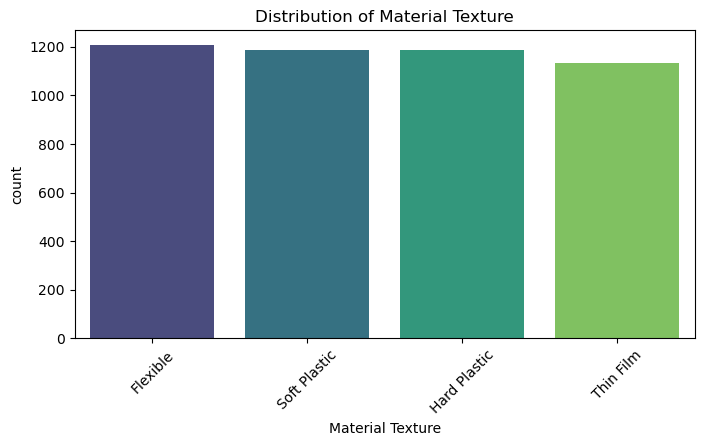

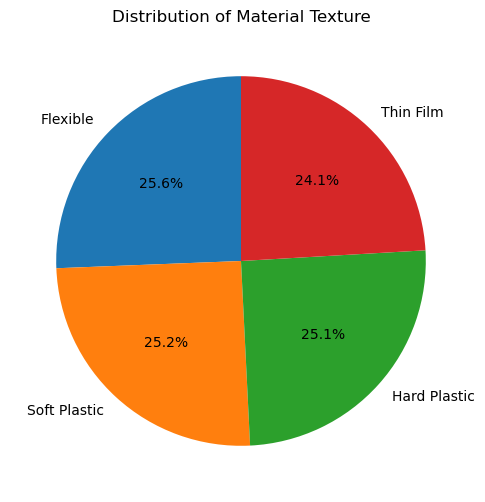

Number of Categories/Classes in column: 5
Category Names: ['White' 'Colored' 'Transparent' 'Mixed' 'Black' nan]
Value Counts (FD) of each Category: Item Color
White          974
Black          952
Transparent    941
Colored        926
Mixed          910
Name: count, dtype: int64
Mode: White


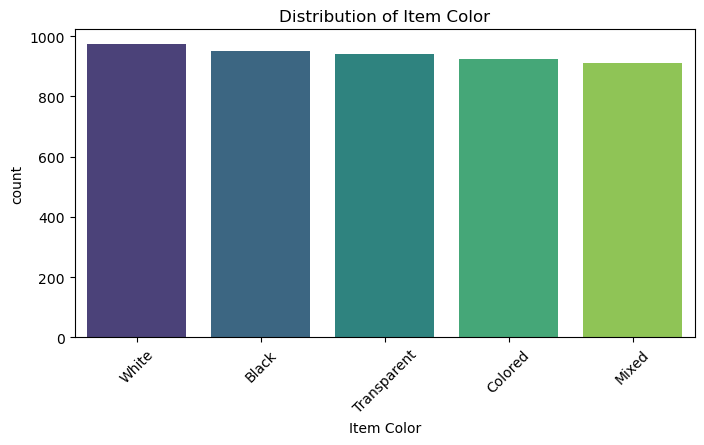

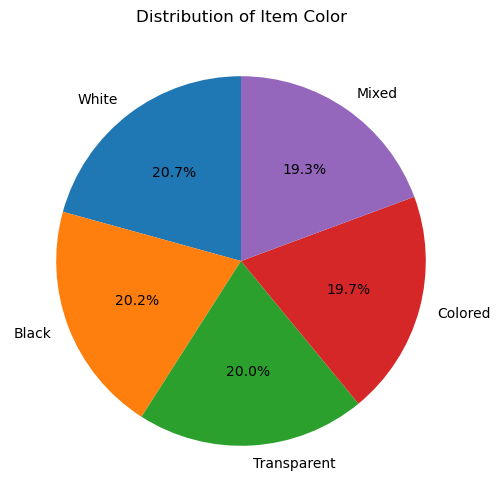

Number of Categories/Classes in column: 4
Category Names: ['Small' 'Medium' 'Bulk' 'Large']
Value Counts (FD) of each Category: Approximate Size
Medium    1724
Large     1543
Small     1219
Bulk       514
Name: count, dtype: int64
Mode: Medium


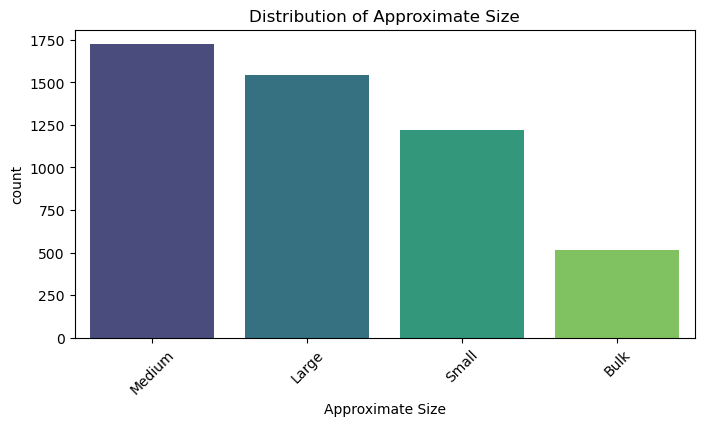

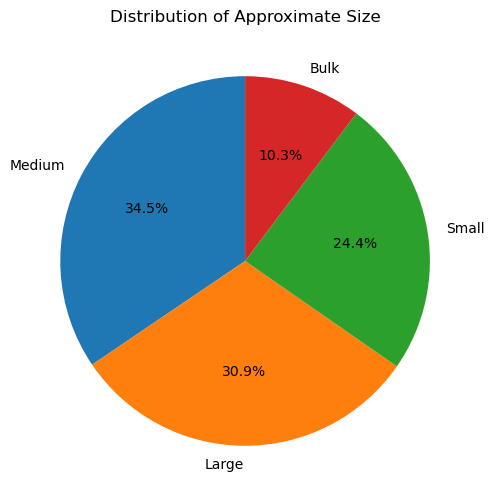

Number of Categories/Classes in column: 3
Category Names: ['Poor' 'Average' 'Good' nan]
Value Counts (FD) of each Category: Condition
Good       2532
Average    1392
Poor        739
Name: count, dtype: int64
Mode: Good


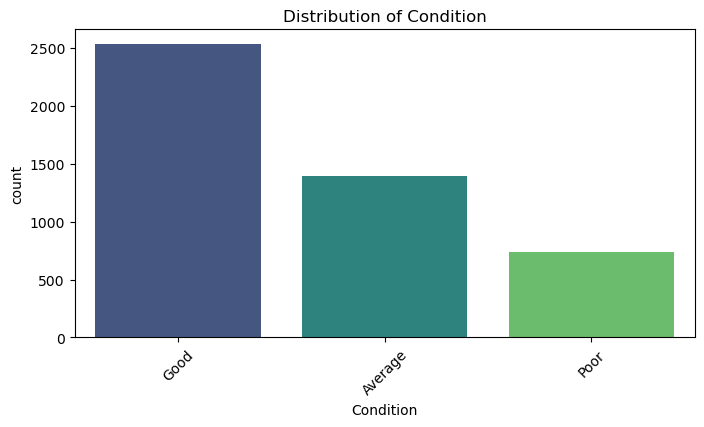

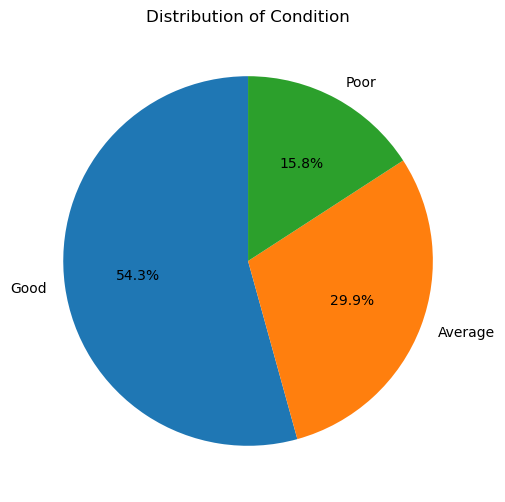

Number of Categories/Classes in column: 4
Category Names: ['Household Use' 'Commercial Packaging' 'Industrial Use' 'Food Packaging']
Value Counts (FD) of each Category: Item Usage
Household Use           2072
Commercial Packaging    1212
Industrial Use          1122
Food Packaging           594
Name: count, dtype: int64
Mode: Household Use


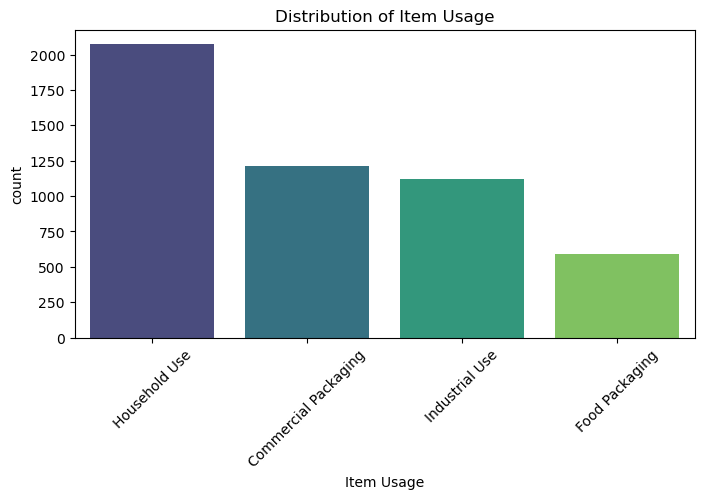

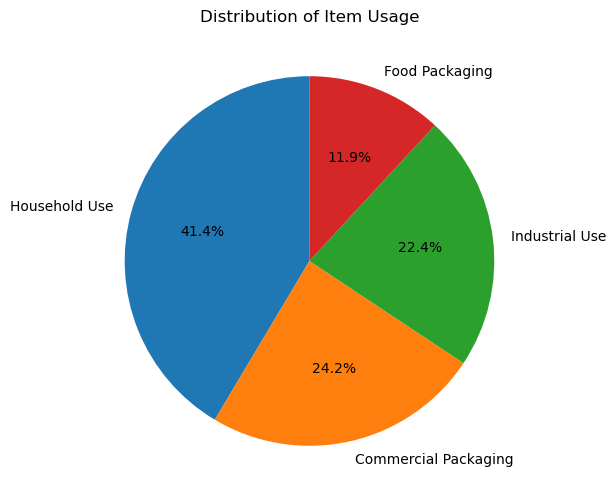

Number of Categories/Classes in column: 3
Category Names: ['No' 'Not Sure' 'Yes' nan]
Value Counts (FD) of each Category: Recycling Symbol
Yes         2302
No          1664
Not Sure     721
Name: count, dtype: int64
Mode: Yes


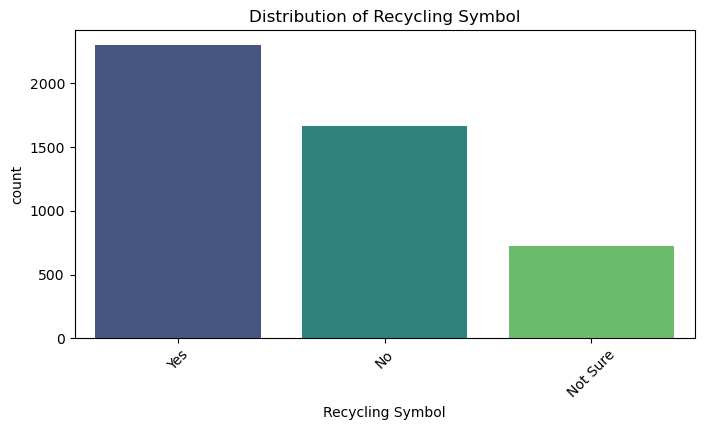

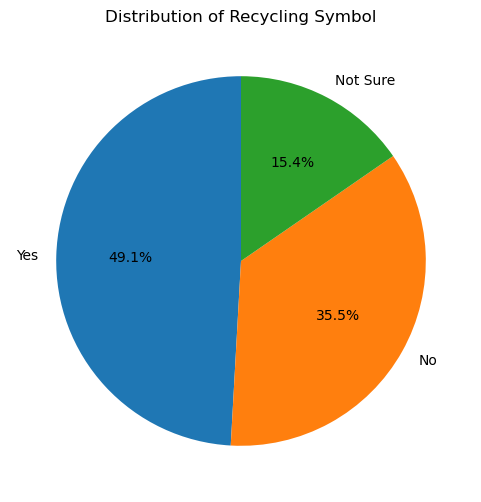

Number of Categories/Classes in column: 20
Category Names: ['Ahmedabad' 'Mumbai' 'Jaipur' 'Nagpur' 'Pune' 'Indore' 'Lucknow'
 'Hyderabad' 'Chennai' 'Meerut' 'Kolkata' 'Thane' 'Bhopal' 'Visakhapatnam'
 'Kanpur' 'Surat' 'Bengaluru' nan 'Patna' 'Coimbatore' 'Delhi']
Value Counts (FD) of each Category: Location
Chennai          277
Mumbai           268
Coimbatore       264
Nagpur           251
Indore           248
Visakhapatnam    244
Ahmedabad        241
Kanpur           237
Kolkata          237
Bhopal           235
Delhi            231
Thane            228
Jaipur           227
Meerut           225
Patna            221
Lucknow          220
Surat            220
Hyderabad        217
Pune             216
Bengaluru        203
Name: count, dtype: int64
Mode: Chennai


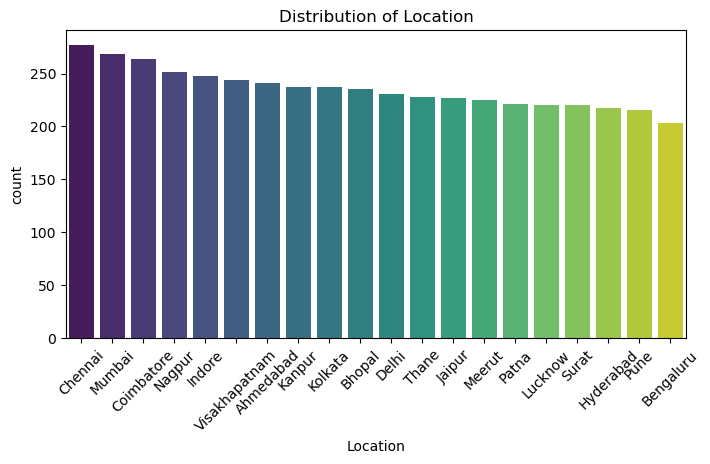

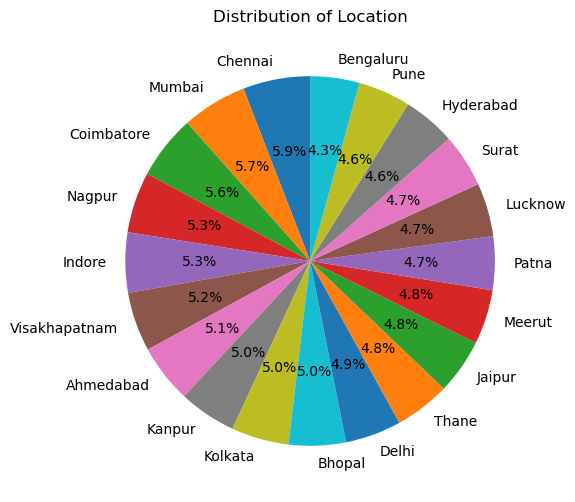

In [12]:
for col in df.columns:
    # For categorical (object) columns
    if col=='event_date':
        break
    elif df[col].dtype == 'object':
        cstudy(col)

Mean: 3
Median: 3
Mode: 2
Range: 8.0
Variance: 2
Standard Deviation: 1
Five Number Summary: min    1.0
25%    2.0
50%    3.0
75%    4.0
max    9.0
Name: Approximate Quantity, dtype: float64
Measures of Symmetry
Skewness: 0.77
Kurtosis: 0.55


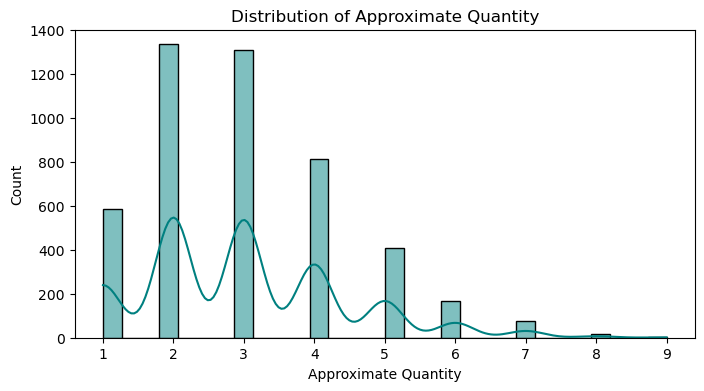

C:\Users\siddi\AppData\Local\Temp\ipykernel_27424\2067959676.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


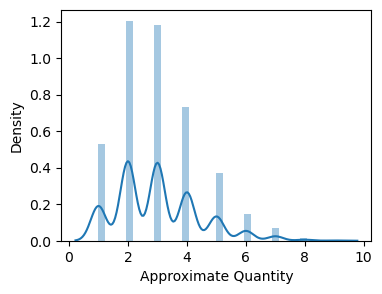


Mean: 439
Median: 331
Mode: 993
Range: 992.45
Variance: 146966
Standard Deviation: 383
Five Number Summary: min      1.0
25%     69.0
50%    331.0
75%    881.0
max    993.0
Name: Resale Value (INR), dtype: float64
Measures of Symmetry
Skewness: 0.37
Kurtosis: -1.46


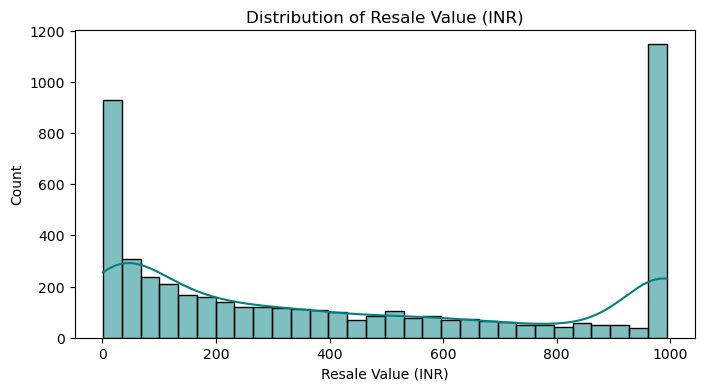

C:\Users\siddi\AppData\Local\Temp\ipykernel_27424\2067959676.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


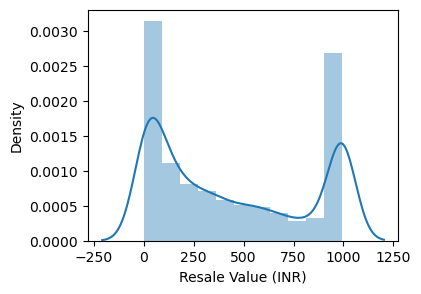


Mean: 4
Median: 4
Mode: 4
Range: 8.44
Variance: 2
Standard Deviation: 1
Five Number Summary: min    0.0
25%    3.0
50%    4.0
75%    5.0
max    9.0
Name: Recycle Score (0-10), dtype: float64
Measures of Symmetry
Skewness: 0.09
Kurtosis: -0.3


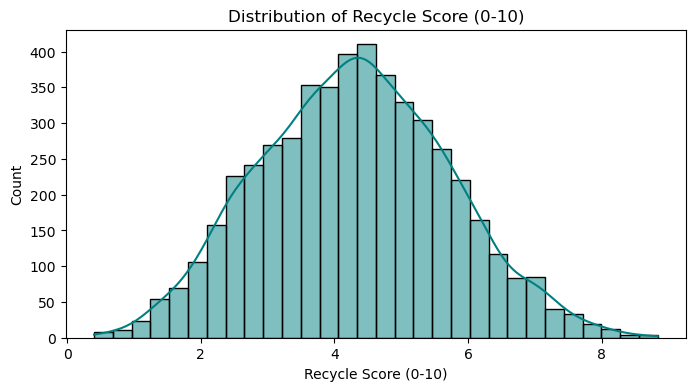

C:\Users\siddi\AppData\Local\Temp\ipykernel_27424\2067959676.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


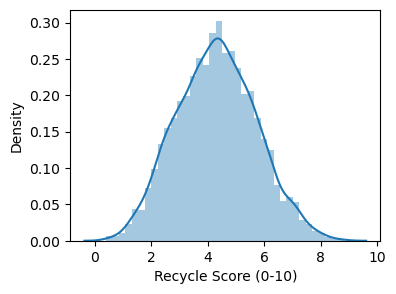


Mean: 4
Median: 3
Mode: 0
Range: 9.61
Variance: 5
Standard Deviation: 2
Five Number Summary: min     0.0
25%     2.0
50%     3.0
75%     5.0
max    10.0
Name: Reuse Score (0-10), dtype: float64
Measures of Symmetry
Skewness: 0.35
Kurtosis: -0.74


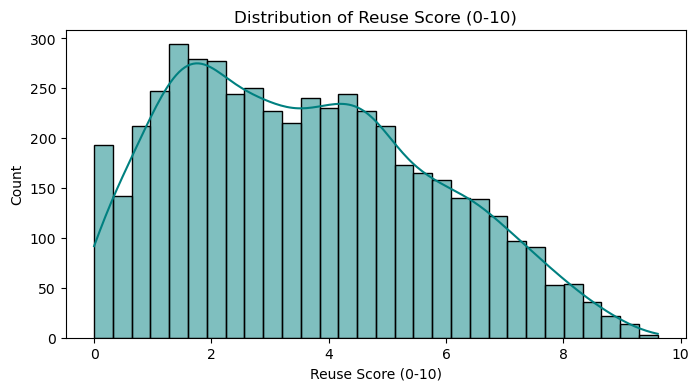

C:\Users\siddi\AppData\Local\Temp\ipykernel_27424\2067959676.py:43: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


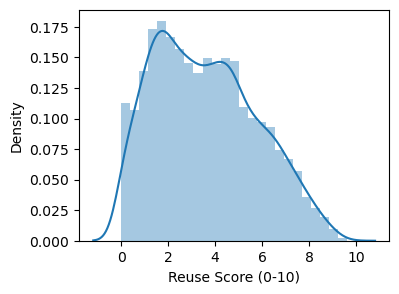

In [13]:
for col in df.columns:
    if df[col].dtype != 'datetime64[ns]' and df[col].dtype != 'object':
        nstudy(col)

## Null values Handling

In [14]:
df.isnull().sum()

Item Category             0
Material Texture        286
Item Color              297
Approximate Size          0
Approximate Quantity    289
Condition               337
Item Usage                0
Recycling Symbol        313
Location                290
Resale Value (INR)        0
Recycle Score (0-10)      0
Reuse Score (0-10)        0
dtype: int64

## Filling Null values

In [15]:
## Categorical Features
df['Material Texture'] = df.groupby('Item Category')['Material Texture'].transform(lambda x: x.fillna(x.mode()[0]))
df['Item Color'] = df.groupby('Item Category')['Item Color'].transform(lambda x: x.fillna(x.mode()[0]))
df["Condition"] = df["Condition"].fillna(df["Condition"].mode()[0])
df["Recycling Symbol"] = df["Recycling Symbol"].fillna(df["Recycling Symbol"].mode()[0])
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])

## Numerical features
df["Approximate Quantity"] = df["Approximate Quantity"].fillna(df["Approximate Quantity"].median())


In [16]:
df.isnull().sum()

Item Category           0
Material Texture        0
Item Color              0
Approximate Size        0
Approximate Quantity    0
Condition               0
Item Usage              0
Recycling Symbol        0
Location                0
Resale Value (INR)      0
Recycle Score (0-10)    0
Reuse Score (0-10)      0
dtype: int64

In [17]:
df = df.rename(columns={'Resale Value (INR)':'resale_value'})
df = df.rename(columns={'Recycle Score (0-10)':'recycle_score'})
df = df.rename(columns={'Reuse Score (0-10)':'reuse_score'})

In [19]:
# Renaming columns according to snake casing for better readability and documentation
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [20]:
df.head()

,item_category,material_texture,item_color,approximate_size,approximate_quantity,condition,item_usage,recycling_symbol,location,resale_value,recycle_score,reuse_score
0,Water Can (20L),Hard Plastic,White,Small,3.0,Poor,Household Use,No,Ahmedabad,90.35,5.37,1.47
1,Food Container,Soft Plastic,Colored,Medium,7.0,Average,Household Use,No,Mumbai,85.59,4.09,4.12
2,Dustbin,Hard Plastic,Colored,Bulk,4.0,Good,Household Use,No,Jaipur,671.57,4.61,8.02
3,Plastic Pallet,Thin Film,Colored,Medium,3.0,Good,Commercial Packaging,No,Jaipur,993.45,2.39,3.18
4,Tiffin Box,Hard Plastic,Transparent,Medium,5.0,Good,Household Use,Not Sure,Nagpur,317.39,5.70,7.95


## Resale value

In [266]:
X = df.drop(['resale_value','recycle_score','reuse_score'],axis=1)
y = df['resale_value']

## Scaling

In [227]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ["approximate_quantity"]

scaled_df = pd.DataFrame(
    scaler.fit_transform(X[cols_to_scale]),
    columns=cols_to_scale
)


In [228]:
scaled_df

,approximate_quantity
0,0.250
1,0.750
2,0.375
3,0.250
4,0.500
...,...
4995,0.000
4996,0.125
4997,0.125
4998,0.375


## Trian-Test Split

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model training - Catboosting Algorithm

In [269]:
from catboost import CatBoostRegressor, Pool

cat_cols = ['item_category','material_texture','item_color','approximate_size',
            'condition','item_usage','recycling_symbol','location']

X_cat = df.drop(['resale_value','recycle_score','reuse_score'], axis=1)
y_cat = df['resale_value']

rs_model_cb = CatBoostRegressor(
    iterations=2000,
    learning_rate=0.05,
    depth=7,
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100
)

cat_idx = [X_cat.columns.get_loc(c) for c in cat_cols]
rs_model_cb.fit(X_cat, y_cat, cat_features=cat_idx, verbose=100)

0:	learn: 368.1187870	total: 46.1ms	remaining: 1m 32s
100:	learn: 98.9940465	total: 6.36s	remaining: 1m 59s
200:	learn: 91.6865751	total: 12.4s	remaining: 1m 51s
300:	learn: 86.7537229	total: 18.8s	remaining: 1m 46s
400:	learn: 82.7154216	total: 25.1s	remaining: 1m 40s
500:	learn: 79.4330545	total: 31.4s	remaining: 1m 34s
600:	learn: 76.6711955	total: 37.8s	remaining: 1m 27s
700:	learn: 73.5739218	total: 44.2s	remaining: 1m 21s
800:	learn: 71.3915863	total: 50.6s	remaining: 1m 15s
900:	learn: 68.8456465	total: 57.5s	remaining: 1m 10s
1000:	learn: 66.5523870	total: 1m 3s	remaining: 1m 3s
1100:	learn: 64.2911898	total: 1m 10s	remaining: 57.5s
1200:	learn: 62.2305960	total: 1m 16s	remaining: 51.1s
1300:	learn: 60.1619831	total: 1m 23s	remaining: 44.7s
1400:	learn: 58.2340477	total: 1m 29s	remaining: 38.3s
1500:	learn: 56.4002906	total: 1m 35s	remaining: 31.9s
1600:	learn: 54.7331250	total: 1m 42s	remaining: 25.5s
1700:	learn: 52.9471686	total: 1m 48s	remaining: 19.1s
1800:	learn: 51.39392

In [270]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Predict using CatBoost model
y_pred_cb = rs_model_cb.predict(X_test)

# Metrics
print("R2:", r2_score(y_test, y_pred_cb))
print("MAE:", mean_absolute_error(y_test, y_pred_cb))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cb)))


R2: 0.9628783645502146
MAE: 41.48401983322637
RMSE: 73.93598953396796


## Saving the model



In [271]:
import os
import joblib

joblib.dump(rs_model, "models1/rsmodel.pkl")
#joblib.dump(ohe, "models1/encoding.pkl")
#joblib.dump(scaler, "models1/scaler.pkl")

['models1/rsmodel.pkl']

In [272]:
# Load models and preprocessors
import os
import joblib

rs_model = joblib.load("models1/rsmodel.pkl")
ohe = joblib.load("models1/encoding.pkl")
scaler = joblib.load("models1/scaler.pkl")

In [178]:
df.head()

,item_category,material_texture,item_color,approximate_size,approximate_quantity,condition,item_usage,recycling_symbol,location,resale_value,recycle_score,reuse_score
0,Water Can (20L),Hard Plastic,White,Small,3.0,Poor,Household Use,No,Ahmedabad,90.35,5.37,1.47
1,Food Container,Soft Plastic,Colored,Medium,7.0,Average,Household Use,No,Mumbai,85.59,4.09,4.12
2,Dustbin,Hard Plastic,Colored,Bulk,4.0,Good,Household Use,No,Jaipur,671.57,4.61,8.02
3,Plastic Pallet,Thin Film,Colored,Medium,3.0,Good,Commercial Packaging,No,Jaipur,993.45,2.39,3.18
4,Tiffin Box,Hard Plastic,Transparent,Medium,5.0,Good,Household Use,Not Sure,Nagpur,317.39,5.70,7.95


## Real time prediction

In [290]:
# Example new data for prediction
import pandas as pd

new_data = pd.DataFrame({
    'item_category': ['Water Can (20L)'],
    'material_texture': ['Hard Plastic'],
    'item_color': ['White'],
    'approximate_size': ['Small'],
    'approximate_quantity': [3.0],
    'condition': ['Poor'],
    'item_usage': ['Household Use'],
    'recycling_symbol': ['No'],
    'location': ['Ahmedabad']
})

# Separate categorical and numerical columns
categorical_cols = ['item_category', 'material_texture','item_color','approximate_size','condition','item_usage','recycling_symbol', 'location']
numerical_cols = ['approximate_quantity']

# Encode categorical features
cat_encoded = ohe.transform(new_data[categorical_cols])
cat_encoded_df = pd.DataFrame(cat_encoded.toarray(),
                              columns=ohe.get_feature_names_out())

# Scale numerical features
num_scaled = scaler.transform(new_data[numerical_cols])
num_scaled_df = pd.DataFrame(num_scaled, columns=numerical_cols)

# Combine scaled + encoded columns
X_new = pd.concat([num_scaled_df, cat_encoded_df], axis=1)


In [291]:
# Predict using your Random Forest model
pred = rs_model.predict(X_new)

print("Predicted Resale Value:", pred)


Predicted Resale Value: [95.76278753]


## Recycle Value

In [155]:
X = df.drop(['resale_value','recycle_score','reuse_score'],axis=1)
y = df['recycle_score']

## One-Hot Encoding

In [156]:
# Library

from sklearn.preprocessing import OneHotEncoder

# Define Object

ohe = OneHotEncoder(handle_unknown='ignore')

In [157]:
# Using fit_transform method to convert column data into onehot encodings

ohedata = ohe.fit_transform(X[['item_category', 'material_texture','item_color','approximate_size','condition','item_usage','recycling_symbol', 'location']]).toarray() # converting data to array

In [158]:
# Converting ohedata to dataframe

ohedata = pd.DataFrame(ohedata, columns=ohe.get_feature_names_out())

## Scaling the Features

In [159]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ["approximate_quantity"]

scaled_df = pd.DataFrame(
    scaler.fit_transform(X[cols_to_scale]),
    columns=cols_to_scale
)


In [160]:
X=pd.concat([scaled_df,ohedata],axis=1)

## Train-Test Split

In [161]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Training - Catboosting Algorithm

In [162]:
cat_features = [X_train.columns.get_loc(col) 
                for col in X_train.columns 
                if X_train[col].dtype == 'object']


In [163]:
from catboost import CatBoostRegressor

rc_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)

rc_model.fit(X_train, y_train, cat_features=cat_features)


In [164]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = rc_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.7240964682326303
MAE: 0.5733557308792667
RMSE: 0.7442621006769002


In [117]:
import os
import joblib

joblib.dump(rc_model, "models1/rcmodel.pkl")

['models1/rcmodel.pkl']

In [118]:
# Load models and preprocessors
import os
import joblib

rc_model = joblib.load("models1/rcmodel.pkl")

## Real Time Prediction

In [183]:
# Example new data for prediction
import pandas as pd

new_data = pd.DataFrame({
    'item_category': ['Food Container'],
    'material_texture': ['Soft Plastic'],
    'item_color': ['Colored'],
    'approximate_size': ['Medium'],
    'approximate_quantity': [7.0],
    'condition': ['Average'],
    'item_usage': ['Household Use'],
    'recycling_symbol': ['No'],
    'location': ['Mumbai']
})

# Separate categorical and numerical columns
categorical_cols = ['item_category', 'material_texture','item_color','approximate_size','condition','item_usage','recycling_symbol', 'location']
numerical_cols = ['approximate_quantity']

# Encode categorical features
cat_encoded = ohe.transform(new_data[categorical_cols])
cat_encoded_df = pd.DataFrame(cat_encoded.toarray(),
                              columns=ohe.get_feature_names_out())

# Scale numerical features
num_scaled = scaler.transform(new_data[numerical_cols])
num_scaled_df = pd.DataFrame(num_scaled, columns=numerical_cols)

# Combine scaled + encoded columns
X_new = pd.concat([num_scaled_df, cat_encoded_df], axis=1)


In [184]:
# Predict using your Random Forest model
pred = rc_model.predict(X_new)

print("Predicted Recycle score:", pred)

Predicted Resale Value: [4.12590017]


## Reuse score

In [165]:
X = df.drop(['resale_value','recycle_score','reuse_score'],axis=1)
y = df['reuse_score']

In [166]:
# Library

from sklearn.preprocessing import OneHotEncoder

# Define Object

ohe = OneHotEncoder(handle_unknown='ignore')

# handle_unknown=ignore -> future classes will be ignored
# drop=first -> is another param for dummy variable trap

In [167]:
# Using fit_transform method to convert column data into onehot encodings

ohedata = ohe.fit_transform(X[['item_category', 'material_texture','item_color','approximate_size','condition','item_usage','recycling_symbol', 'location']]).toarray() # converting data to array

In [168]:
# Converting ohedata to dataframe

ohedata = pd.DataFrame(ohedata, columns=ohe.get_feature_names_out())

## Scaling the Features

In [169]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_scale = ["approximate_quantity"]

scaled_df = pd.DataFrame(
    scaler.fit_transform(X[cols_to_scale]),
    columns=cols_to_scale
)


In [170]:
X=pd.concat([scaled_df,ohedata],axis=1)

## Train-Test Split

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Model Training - Catboosting Algorithm

In [172]:
cat_features = [X_train.columns.get_loc(col) 
                for col in X_train.columns 
                if X_train[col].dtype == 'object']


In [173]:
from catboost import CatBoostRegressor

ru_model = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    loss_function='RMSE',
    random_seed=42,
    verbose=0
)

ru_model.fit(X_train, y_train, cat_features=cat_features)


In [174]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

y_pred = ru_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.8070050459112502
MAE: 0.6425267969489517
RMSE: 0.9621790472998794


In [175]:
import os
import joblib

joblib.dump(ru_model, "models1/rumodel.pkl")

['models1/rumodel.pkl']

In [176]:
# Load models and preprocessors
import os
import joblib

ru_model = joblib.load("models1/rumodel.pkl")

## Real time Predictions

In [187]:
# Example new data for prediction
import pandas as pd

new_data = pd.DataFrame({
    'item_category': ['Food Container'],
    'material_texture': ['Soft Plastic'],
    'item_color': ['Colored'],
    'approximate_size': ['Medium'],
    'approximate_quantity': [7.0],
    'condition': ['Average'],
    'item_usage': ['Household Use'],
    'recycling_symbol': ['No'],
    'location': ['Mumbai']
})

# Separate categorical and numerical columns
categorical_cols = ['item_category', 'material_texture','item_color','approximate_size','condition','item_usage','recycling_symbol', 'location']
numerical_cols = ['approximate_quantity']

# Encode categorical features
cat_encoded = ohe.transform(new_data[categorical_cols])
cat_encoded_df = pd.DataFrame(cat_encoded.toarray(),
                              columns=ohe.get_feature_names_out())

# Scale numerical features
num_scaled = scaler.transform(new_data[numerical_cols])
num_scaled_df = pd.DataFrame(num_scaled, columns=numerical_cols)

# Combine scaled + encoded columns
X_new = pd.concat([num_scaled_df, cat_encoded_df], axis=1)


In [188]:
# Predict using your Random Forest model
pred = ru_model.predict(X_new)

print("Predicted Reuse score:", pred)


Predicted Reuse score: [3.86697989]
